In [3]:
import requests
import pandas as pd

# Step 1: Direct URL to the CSV file
url = 'https://www.opendata.nhs.scot/dataset/cff63b00-5c99-4efd-9ff7-83c4a1a95fe9/resource/a020dc7b-750d-4170-9472-9901a514912b/download/smoking_cessation_gender_age.csv'  

# Step 2: Send an HTTP request to the URL
response = requests.get(url)

if response.status_code == 200:
    print("Dataset successfully downloaded!")
    # Step 4: Write the content to a file (if it's CSV)
    with open('smoking_cessation_data.csv', 'wb') as file:
        file.write(response.content)
           # Step 5: Load the CSV into a DataFrame
    df = pd.read_csv('smoking_cessation_data.csv')
    
else:
    print(f"Failed to retrieve the dataset. Status code: {response.status_code}")

df.head()


Dataset successfully downloaded!


,FinancialYear,Gender,GenderQF,AgeGroup,AgeGroupQF,NumberQuitAttempts,NumberFourWeekQuits,NumberTwelveWeekQuits,FourWeekQuitRate,TwelveWeekQuitRate
0,2013/14,Female,NaN,16-17,NaN,481,71,24.0,14.8,5.0
1,2013/14,Male,NaN,16-17,NaN,338,50,11.0,14.8,3.3
2,2013/14,Female,NaN,18-24,NaN,4656,985,316.0,21.2,6.8
3,2013/14,Male,NaN,18-24,NaN,3150,653,178.0,20.7,5.7
4,2013/14,Female,NaN,25-34,NaN,10573,3300,1139.0,31.2,10.8


In [14]:
# The following will show male over female quit attempts 

In [4]:
# List of columns you want to drop
columns_to_drop = ['GenderQF', 'AgeGroupQF', 'NumberFourWeekQuits', 'NumberTwelveWeekQuits', 'FourWeekQuitRate', 'TwelveWeekQuitRate']

# Drop the columns
df = df.drop(columns=columns_to_drop)


In [5]:
df.head(10)

,FinancialYear,Gender,AgeGroup,NumberQuitAttempts
0,2013/14,Female,16-17,481
1,2013/14,Male,16-17,338
2,2013/14,Female,18-24,4656
3,2013/14,Male,18-24,3150
4,2013/14,Female,25-34,10573
5,2013/14,Male,25-34,8406
6,2013/14,Female,35-44,10847
7,2013/14,Male,35-44,9728
8,2013/14,Female,45-54,12057
9,2013/14,Male,45-54,9053


In [6]:
# Group by 'FinancialYear' and 'Gender', then sum 'NumberQuitAttempts'
df_grouped = df.groupby(['FinancialYear', 'Gender'])['NumberQuitAttempts'].sum().reset_index()

# Show the resulting DataFrame
df_grouped.head()


,FinancialYear,Gender,NumberQuitAttempts
0,2013/14,All,93903
1,2013/14,Female,105597
2,2013/14,Male,82191
3,2014/15,All,67800
4,2014/15,Female,75941


In [7]:
# Filter out rows where 'Gender' is 'all'
df_grouped = df_grouped[df_grouped['Gender'] != 'All']

# Show the resulting DataFrame
df_grouped.tail()

,FinancialYear,Gender,NumberQuitAttempts
26,2021/22,Male,28846
28,2022/23,Female,28440
29,2022/23,Male,25482
31,2023/24,Female,31452
32,2023/24,Male,29169


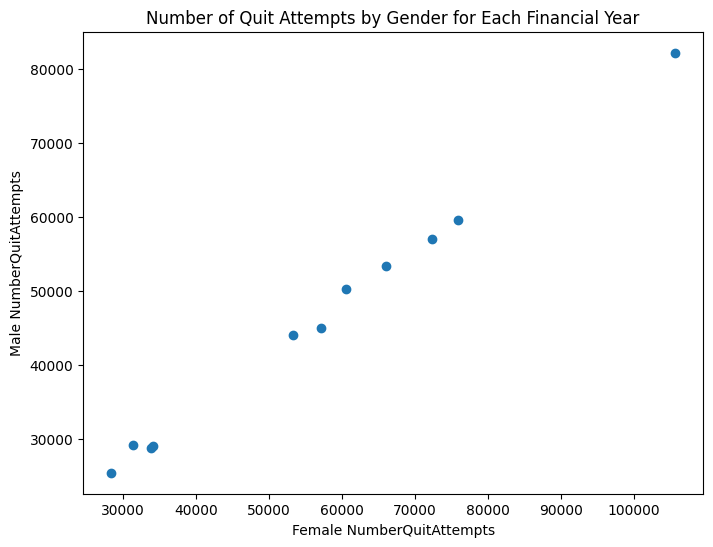

In [8]:
import matplotlib.pyplot as plt

# Filter the DataFrame for Male and Female
df_male = df_grouped[df_grouped['Gender'] == 'Male']
df_female = df_grouped[df_grouped['Gender'] == 'Female']

# Merge the Male and Female data on FinancialYear
df_merged = pd.merge(df_male[['FinancialYear', 'NumberQuitAttempts']], 
                     df_female[['FinancialYear', 'NumberQuitAttempts']], 
                     on='FinancialYear', 
                     suffixes=('_Male', '_Female'))

# Create the scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(df_merged['NumberQuitAttempts_Female'], df_merged['NumberQuitAttempts_Male'])

# Adding labels and title
plt.title('Number of Quit Attempts by Gender for Each Financial Year')
plt.xlabel('Female NumberQuitAttempts')
plt.ylabel('Male NumberQuitAttempts')

# Show the plot
plt.show()

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0     2013
1     2014
2     2015
3     2016
4     2017
5     2018
6     2019
7     2020
8     2021
9     2022
10    2023
Name: FinancialYear, dtype: object

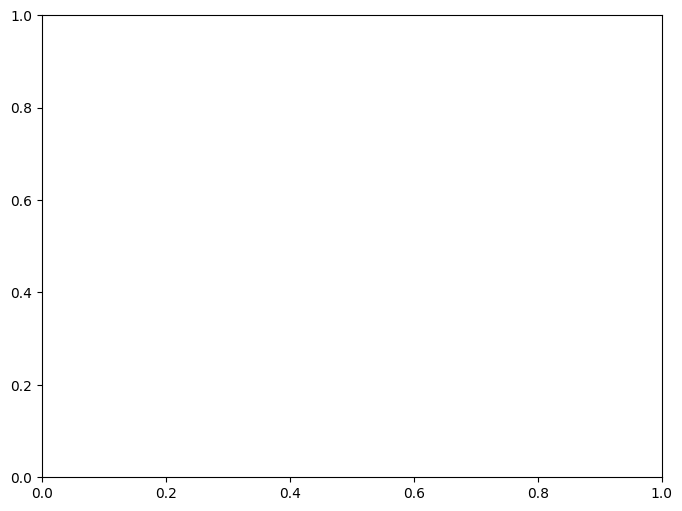

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Shorten the 'FinancialYear' column to the first 4 characters
df_merged['FinancialYear'] = df_merged['FinancialYear'].astype(str).str[:4]
df_merged['FinancialYear'].astype(int)

# Sort the DataFrame by FinancialYear to ensure the most recent year is darkest
df_merged = df_merged.sort_values('FinancialYear')


# Normalize the FinancialYear values for coloring
norm = plt.Normalize(df_merged['FinancialYear'].min(), df_merged['FinancialYear'].max())

# Create a colormap (Blues) and use it with the normalized values
cmap = plt.cm.Blues

# Create the scatterplot with a colormap
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_merged['NumberQuitAttempts_Female'], df_merged['NumberQuitAttempts_Male'],
                      c=df_merged['FinancialYear'], cmap=cmap, norm=norm)

# Adding labels and title
plt.title('Number of Quit Attempts by Gender for Each Financial Year')
plt.xlabel('Female NumberQuitAttempts')
plt.ylabel('Male NumberQuitAttempts')

# Add color bar to show the mapping of color to FinancialYear
plt.colorbar(scatter, label='FinancialYear')

# Show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Shorten the 'FinancialYear' column to the first 4 characters
df_merged['FinancialYear'] = df_merged['FinancialYear'].astype(str).str[:4]

# Sort the DataFrame by FinancialYear to ensure the most recent year is darkest
df_merged = df_merged.sort_values('FinancialYear')

# Normalize the FinancialYear values for coloring
norm = plt.Normalize(df_merged['FinancialYear'].min(), df_merged['FinancialYear'].max())

# Create a colormap (Blues) and use it with the normalized values
cmap = plt.cm.Blues

# Create the scatterplot with a colormap
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_merged['NumberQuitAttempts_Female'], df_merged['NumberQuitAttempts_Male'],
                      c=df_merged['FinancialYear'], cmap=cmap, norm=norm)

# Adding labels and title
plt.title('Number of Quit Attempts by Gender for Each Financial Year')
plt.xlabel('Female NumberQuitAttempts')
plt.ylabel('Male NumberQuitAttempts')

# Add color bar to show the mapping of color to FinancialYear
plt.colorbar(scatter, label='FinancialYear')

# Show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Convert 'FinancialYear' to integer to ensure proper sorting and normalization
df_merged['FinancialYear'] = df_merged['FinancialYear'].astype(int)

# Sort the DataFrame by FinancialYear to ensure the most recent year is darkest
df_merged = df_merged.sort_values('FinancialYear')

# Normalize the FinancialYear values for coloring
norm = plt.Normalize(df_merged['FinancialYear'].min(), df_merged['FinancialYear'].max())

# Create a colormap (Blues) and use it with the normalized values
cmap = plt.cm.Blues

# Create the scatterplot with a colormap
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_merged['NumberQuitAttempts_Female'], df_merged['NumberQuitAttempts_Male'],
                      c=df_merged['FinancialYear'], cmap=cmap, norm=norm)

# Adding labels and title
plt.title('Number of Quit Attempts by Gender for Each Financial Year')
plt.xlabel('Female NumberQuitAttempts')
plt.ylabel('Male NumberQuitAttempts')

# Add color bar to show the mapping of color to FinancialYear
plt.colorbar(scatter, label='FinancialYear')

# Show the plot
plt.show()

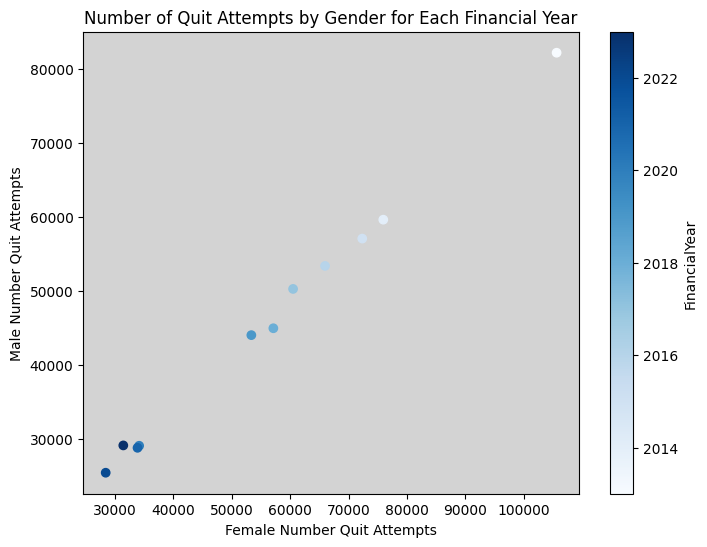

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Convert 'FinancialYear' to integer to ensure proper sorting and normalization
df_merged['FinancialYear'] = df_merged['FinancialYear'].astype(int)

# Sort the DataFrame by FinancialYear to ensure the most recent year is darkest
df_merged = df_merged.sort_values('FinancialYear')

# Normalize the FinancialYear values for coloring
norm = plt.Normalize(df_merged['FinancialYear'].min(), df_merged['FinancialYear'].max())

# Create a colormap (Blues) and use it with the normalized values
cmap = plt.cm.Blues

# Create the scatterplot with a colormap
plt.figure(figsize=(8, 6))

# Set the background color of the plot to light gray
plt.gca().set_facecolor('lightgray')

# Create the scatter plot
scatter = plt.scatter(df_merged['NumberQuitAttempts_Female'], df_merged['NumberQuitAttempts_Male'],
                      c=df_merged['FinancialYear'], cmap=cmap, norm=norm)

# Adding labels and title
plt.title('Number of Quit Attempts by Gender for Each Financial Year')
plt.xlabel('Female Number Quit Attempts')
plt.ylabel('Male Number Quit Attempts')

# Add color bar to show the mapping of color to FinancialYear
plt.colorbar(scatter, label='FinancialYear')

# Show the plot
plt.show()